# Studio 2 - Modeling and Society - Group Project - Team 8

We can use the example project in canvas as a guide.  As a reminder, we choose the energy dataset.  On Friday, the professor suggested that we use either load or price as our y variable (response).

Paula M-Bailey

In [1]:
## importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder #for feature engineering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error # for␣evaluating ml models

# We need to make sure that we remove any library not used.  Again copied from sample project.

The time feature in the orginal dataset is a object rather than a datetime item that we can access and use.  Instead of changing the datatype after loading the data, we changed it now.  We changed time into an index and converted it into a datetime.  This step will change the number of features from 29 to 28.

We created a copy of the orgainal file, so we display the shape.

In [2]:
## loading the dataset

energy =pd.read_csv("/content/energy_dataset.csv.txt")
energyCopy =pd.read_csv("/content/energy_dataset.csv.txt",parse_dates=['time'],index_col=['time'])

In [3]:
energyCopy.index = pd.to_datetime(energyCopy.index, utc='True')

#Background / Research Question

The goal of this project is to explore energy consumption of different sources and its effect on price and electrical load.  We will explore the concept of demand response and its potential impact on pricing. How does consumers respond to price fluctuations? Are there identifiable patterns in consumer behavior that can inform pricing strategies?  Lastly, we will create a model that will predict how much a consumer will spend on electricity and predict the load (or level of energy) concumption.

"This dataset contains four years of electrical consumption, generation, pricing, and weather data for Spain. Consumption and generation data were retrieved from ENTSO-E, a public portal for Transmission Service Operator (TSO) data. Settlement prices were obtained from the Spanish TSO Red Electrica Espana."  

For dataset contains twenty-nine features which are defined as follows:

In [4]:
energy.shape

(35064, 29)

In [5]:
list(energyCopy)

['generation biomass',
 'generation fossil brown coal/lignite',
 'generation fossil coal-derived gas',
 'generation fossil gas',
 'generation fossil hard coal',
 'generation fossil oil',
 'generation fossil oil shale',
 'generation fossil peat',
 'generation geothermal',
 'generation hydro pumped storage aggregated',
 'generation hydro pumped storage consumption',
 'generation hydro run-of-river and poundage',
 'generation hydro water reservoir',
 'generation marine',
 'generation nuclear',
 'generation other',
 'generation other renewable',
 'generation solar',
 'generation waste',
 'generation wind offshore',
 'generation wind onshore',
 'forecast solar day ahead',
 'forecast wind offshore eday ahead',
 'forecast wind onshore day ahead',
 'total load forecast',
 'total load actual',
 'price day ahead',
 'price actual']

## Preliminary Analysis

"After loading the data, we conducted a preliminary examination of the dataset to understand its structure.  We used methods such as examining the shape of the dataset, data type, and distribution of the variables to make some initial observations."

In [6]:
# Display the first few rows of the dataset
print(energyCopy.head())

                           generation biomass  \
time                                            
2014-12-31 23:00:00+00:00               447.0   
2015-01-01 00:00:00+00:00               449.0   
2015-01-01 01:00:00+00:00               448.0   
2015-01-01 02:00:00+00:00               438.0   
2015-01-01 03:00:00+00:00               428.0   

                           generation fossil brown coal/lignite  \
time                                                              
2014-12-31 23:00:00+00:00                                 329.0   
2015-01-01 00:00:00+00:00                                 328.0   
2015-01-01 01:00:00+00:00                                 323.0   
2015-01-01 02:00:00+00:00                                 254.0   
2015-01-01 03:00:00+00:00                                 187.0   

                           generation fossil coal-derived gas  \
time                                                            
2014-12-31 23:00:00+00:00                               

The dataset contains 35,064 observations with 29 features and the data type for each variable is consistent as a float however, time is defined as object.  We will convert date object into a date/time, so we will be able to use it.

In [7]:
# checking the data types
energyCopy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil coal-derived gas           35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation fossil oil shale                  35046 non-null  float64
 7   generation fossil peat                       35046 non-null  float64
 8   generation geothermal                        35046 non-null  float64
 9   generation hydro pumped s

## Exploratory Data Analysis (EDA)

Through various charts and statistical summaries, we explore the distribution and relationships among variables. The EDA helps uncover patterns, trends, and anomalies in the data. To ensure the quality of the data, Some charts used to examine the variable(s) include a Box Plot, Histogram, Bar Chart, Pie Chart, Violin Chart, and Scatter Plot. To ensure the quality of the analysis data cleaning, missing values, and outliers need to be handled if applicable! This is crucial to receive full points in your submission!

...above copied from sample.....

We double checked the dataset for null values.  As we can see below, the dataset does contain missing or values. We will not use "generation hydro pumped storage aggregated" or "forecast wind offshore eday ahead" in our analysis.  Both have no data available.

In [8]:
energyCopy.isna().sum()

generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                              

In [9]:
energyCopy.isnull().sum()   #verified same results isna vs isnull

generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                              

In [10]:
for column_name in energyCopy.columns:
    column = energyCopy[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()
    print(f"{column_name:{50}} : {count}")

generation biomass                                 : 4
generation fossil brown coal/lignite               : 10517
generation fossil coal-derived gas                 : 35046
generation fossil gas                              : 1
generation fossil hard coal                        : 3
generation fossil oil                              : 3
generation fossil oil shale                        : 35046
generation fossil peat                             : 35046
generation geothermal                              : 35046
generation hydro pumped storage aggregated         : 0
generation hydro pumped storage consumption        : 12607
generation hydro run-of-river and poundage         : 3
generation hydro water reservoir                   : 3
generation marine                                  : 35045
generation nuclear                                 : 3
generation other                                   : 4
generation other renewable                         : 3
generation solar                     

Based on our null values check, we decided to check each feature to determine the number of zero values.  A zero could indicate that a value is missing or it could be accurate; however, for this project, it is not beneficial.  We can see below several features should be removed from the final dataset.

1. generation fossil brown coal/lignite               : 10517
2. generation fossil coal-derived gas                 : 35046
3. generation fossil oil shale                        : 35046
4. generation fossil peat                             : 35046
5. generation geothermal                              : 35046
6. generation hydro pumped storage consumption        : 12607
7. generation marine                                  : 35045
8. generation wind offshore                           : 35046

We also included the null variables discovered above
1. generation hydro pumped storage aggregated         : 35046
2. forecast wind offshore eday ahead                  : 35064


In [11]:
energyCopy.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead',
           'generation wind offshore', 'generation fossil coal-derived gas',
           'generation fossil oil shale', 'generation fossil peat', 'generation marine',
           'generation wind offshore', 'generation geothermal',
           'generation hydro pumped storage consumption','generation fossil brown coal/lignite'], inplace = True, axis = 1)

We need to address the NA values within the dataset.  We could remove the observations, but a better method would be to use fillna() to replace the NaN value with the mean of the column.

In [12]:
energyCopy.shape

# confirmation that features are removed.

(35064, 18)

In [13]:
#for column_name in energyCopy.columns:
#    column = energyCopy[column_name]

#    count = (column == 0).sum()
#    if (count != 0):
#      energyCopy[column].fillna(value=energyCopy[column].mean(),inplace=True)

#energyCopy.isnull().sum()

In [14]:
energyCopy.columns

Index(['generation biomass', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [15]:
# fillna used to impute any missing information with mean
#  Work on fixing the for loop, so you can reduce the amount of code below

energyCopy['generation biomass'].fillna(value=energyCopy['generation biomass'].mean(),inplace=True)
energyCopy['generation fossil gas'].fillna(value=energyCopy['generation fossil gas'].mean(),inplace=True)
energyCopy['generation fossil hard coal'].fillna(value=energyCopy['generation fossil hard coal'].mean(),inplace=True)
energyCopy['generation fossil oil'].fillna(value=energyCopy['generation fossil oil'].mean(),inplace=True)

energyCopy['generation hydro run-of-river and poundage'].fillna(value=energyCopy['generation hydro run-of-river and poundage'].mean(),inplace=True)
energyCopy['generation hydro water reservoir'].fillna(value=energyCopy['generation hydro water reservoir'].mean(),inplace=True)
energyCopy['generation nuclear'].fillna(value=energyCopy['generation nuclear'].mean(),inplace=True)
energyCopy['generation other'].fillna(value=energyCopy['generation other'].mean(),inplace=True)
energyCopy['generation other renewable'].fillna(value=energyCopy['generation other renewable'].mean(),inplace=True)

energyCopy['generation wind onshore'].fillna(value=energyCopy['generation wind onshore'].mean(),inplace=True)
energyCopy['total load actual'].fillna(value=energyCopy['total load actual'].mean(),inplace=True)
energyCopy['generation waste'].fillna(value=energyCopy['generation waste'].mean(),inplace=True)
energyCopy['generation solar'].fillna(value=energyCopy['generation solar'].mean(),inplace=True)

We finally have a preliminary energy dataset.  We have addressed the missing values by imputing it with an average value.  We determine the number of zero observations by feature and removed features with 30% of its values represented as zero.

Below we have confirmed our energy dataset does not have any NaN values.

In [16]:
energyCopy.isna().sum()

generation biomass                            0
generation fossil gas                         0
generation fossil hard coal                   0
generation fossil oil                         0
generation hydro run-of-river and poundage    0
generation hydro water reservoir              0
generation nuclear                            0
generation other                              0
generation other renewable                    0
generation solar                              0
generation waste                              0
generation wind onshore                       0
forecast solar day ahead                      0
forecast wind onshore day ahead               0
total load forecast                           0
total load actual                             0
price day ahead                               0
price actual                                  0
dtype: int64

<Axes: >

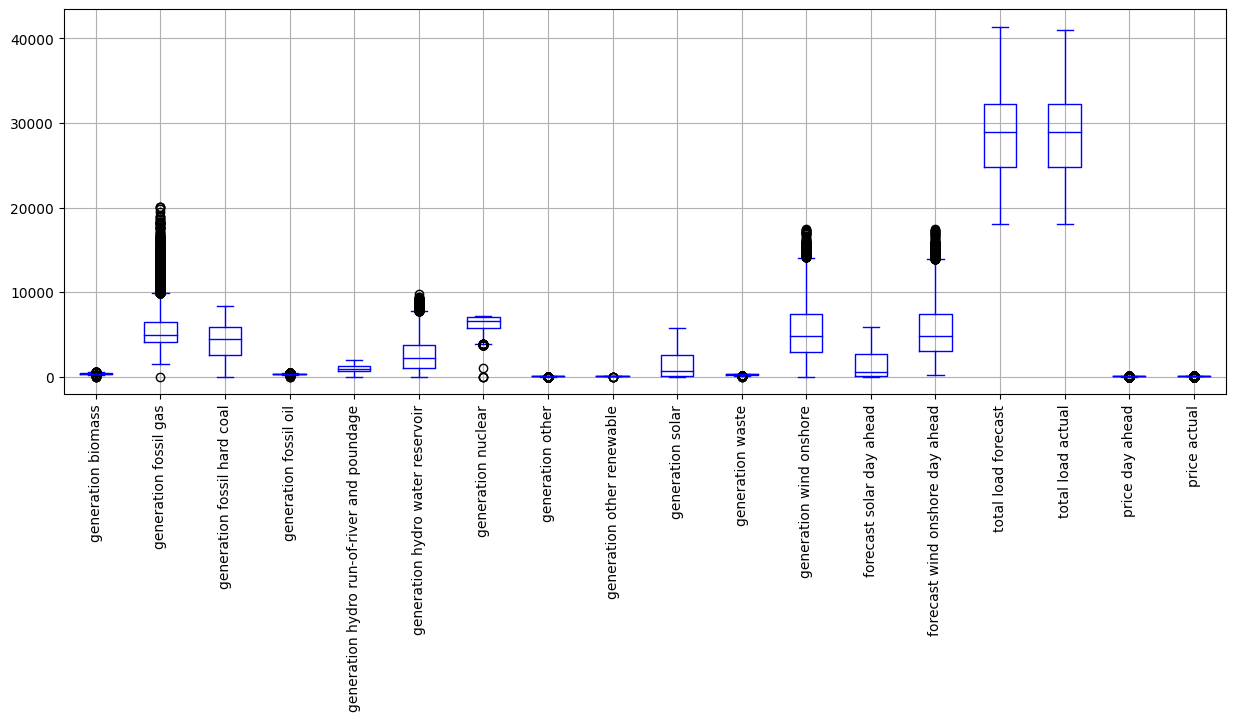

In [17]:
# Boxplot of the remaining columns
energyCopy.boxplot(rot= 90, color="blue",figsize=(15,5))

<Axes: >

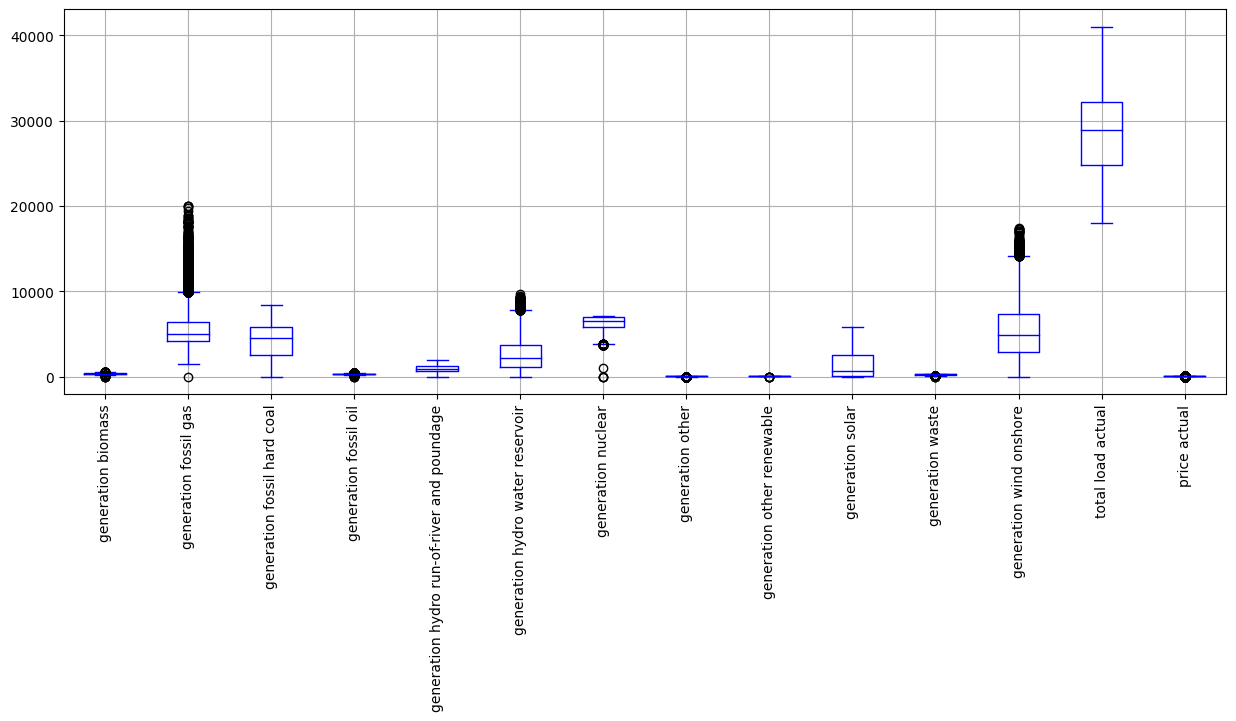

In [18]:
# Boxplot of the remaining columns - excluded columns
temp = energyCopy.loc[:, ~energyCopy.columns.isin(['price day ahead', 'total load forecast',
                                                   'forecast solar day ahead','forecast wind onshore day ahead'])]
temp.boxplot(rot= 90, color="blue",figsize=(15,5))

In [19]:
energyCopy[['generation fossil gas',
           'generation fossil hard coal','generation fossil oil',
           'generation nuclear']].describe()

,generation fossil gas,generation fossil hard coal,generation fossil oil,generation nuclear
count,35064.000000,35064.000000,35064.000000,35064.000000
mean,5622.737488,4256.065742,298.319789,6263.907039
std,2201.265238,1961.097443,52.506441,839.464380
min,0.000000,0.000000,0.000000,0.000000
25%,4127.000000,2528.750000,263.000000,5761.000000
50%,4971.000000,4473.000000,300.000000,6563.500000
75%,6428.000000,5837.000000,330.000000,7024.000000
max,20034.000000,8359.000000,449.000000,7117.000000


In [20]:
energyCopy['generation fossil gas'].median()

4971.0

In [21]:
energyCopy[['generation hydro run-of-river and poundage','generation hydro water reservoir',
           'generation solar','generation wind onshore','generation other renewable']].describe()

,generation hydro run-of-river and poundage,generation hydro water reservoir,generation solar,generation wind onshore,generation other renewable
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,972.116108,2605.114735,1432.665925,5464.479769,85.639702
std,400.668934,1834.728624,1679.688577,3212.866588,14.073940
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,637.000000,1078.000000,71.000000,2933.750000,74.000000
50%,906.000000,2165.000000,616.000000,4850.500000,88.000000
75%,1250.000000,3756.250000,2575.250000,7397.000000,97.000000
max,2000.000000,9728.000000,5792.000000,17436.000000,119.000000


In [22]:
energyCopy[['generation biomass','generation other','generation waste']].describe()

,generation biomass,generation other,generation waste
count,35064.000000,35064.000000,35064.000000
mean,383.513540,60.228585,269.452133
std,85.330814,20.233185,50.181934
min,0.000000,0.000000,0.000000
25%,333.000000,53.000000,240.000000
50%,367.000000,57.000000,279.000000
75%,433.000000,80.000000,310.000000
max,592.000000,106.000000,357.000000


In [23]:
energyCopy.describe()
#consider breaking up the features to improve look and readability

,generation biomass,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.513540,5622.737488,4256.065742,298.319789,972.116108,2605.114735,6263.907039,60.228585,85.639702,1432.665925,269.452133,5464.479769,1439.066735,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.330814,2201.265238,1961.097443,52.506441,400.668934,1834.728624,839.464380,20.233185,14.073940,1679.688577,50.181934,3212.866588,1677.703355,3176.312853,4594.100854,4572.638723,14.618900,14.204083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,4127.000000,2528.750000,263.000000,637.000000,1078.000000,5761.000000,53.000000,74.000000,71.000000,240.000000,2933.750000,69.000000,2979.000000,24793.750000,24810.000000,41.490000,49.347500
50%,367.000000,4971.000000,4473.000000,300.000000,906.000000,2165.000000,6563.500000,57.000000,88.000000,616.000000,279.000000,4850.500000,576.000000,4855.000000,28906.000000,28894.000000,50.520000,58.020000
75%,433.000000,6428.000000,5837.000000,330.000000,1250.000000,3756.250000,7024.000000,80.000000,97.000000,2575.250000,310.000000,7397.000000,2636.000000,7353.000000,32263.250000,32186.250000,60.530000,68.010000
max,592.000000,20034.000000,8359.000000,449.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,5836.000000,17430.000000,41390.000000,41015.000000,101.990000,116.800000


[]

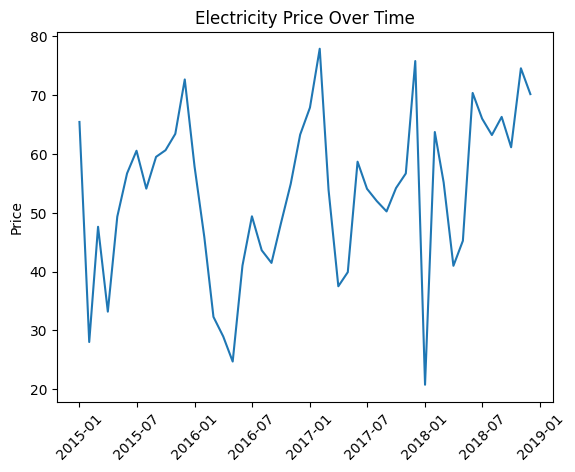

In [24]:
#Plot electrical price over time
monthly_price = energyCopy['price actual'].asfreq('M')

fig, ax = plt.subplots(1,1)
plt.title("Electricity Price Over Time")
#labels = ['Jan 15', 'Jul 15', 'Jan 16', 'Jul 16', 'Jan 17', 'Jul 17', 'Jan 18', 'Jul 18', 'Jan 19']
plt.xticks(rotation =45)
plt.ylabel("Price")
ax.plot(monthly_price, label = 'Monthly Price')


plt.plot()

In [25]:
## seasonal_decompose model  (Time Series)
from statsmodels.tsa.seasonal import seasonal_decompose

energyTime =pd.read_csv("/content/energy_dataset.csv.txt")

energyTime.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead',
           'generation wind offshore', 'generation fossil coal-derived gas',
           'generation fossil oil shale', 'generation fossil peat', 'generation marine',
           'generation wind offshore', 'generation geothermal',
           'generation hydro pumped storage consumption','generation fossil brown coal/lignite',
           'forecast solar day ahead', 'forecast wind onshore day ahead','total load forecast',
           'total load actual','price day ahead'    ], inplace = True, axis = 1)



In [26]:
energyTime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   time                                        35064 non-null  object 
 1   generation biomass                          35045 non-null  float64
 2   generation fossil gas                       35046 non-null  float64
 3   generation fossil hard coal                 35046 non-null  float64
 4   generation fossil oil                       35045 non-null  float64
 5   generation hydro run-of-river and poundage  35045 non-null  float64
 6   generation hydro water reservoir            35046 non-null  float64
 7   generation nuclear                          35047 non-null  float64
 8   generation other                            35046 non-null  float64
 9   generation other renewable                  35046 non-null  float64
 10  generation

In [27]:
# fillna used to impute any missing information with mean
#  Work on fixing the for loop, so you can reduce the amount of code below

energyTime['generation biomass'].fillna(value=energyCopy['generation biomass'].mean(),inplace=True)
energyTime['generation fossil gas'].fillna(value=energyCopy['generation fossil gas'].mean(),inplace=True)
energyTime['generation fossil hard coal'].fillna(value=energyCopy['generation fossil hard coal'].mean(),inplace=True)
energyTime['generation fossil oil'].fillna(value=energyCopy['generation fossil oil'].mean(),inplace=True)

energyTime['generation hydro run-of-river and poundage'].fillna(value=energyCopy['generation hydro run-of-river and poundage'].mean(),inplace=True)
energyTime['generation hydro water reservoir'].fillna(value=energyCopy['generation hydro water reservoir'].mean(),inplace=True)
energyTime['generation nuclear'].fillna(value=energyCopy['generation nuclear'].mean(),inplace=True)
energyTime['generation other'].fillna(value=energyCopy['generation other'].mean(),inplace=True)
energyTime['generation other renewable'].fillna(value=energyCopy['generation other renewable'].mean(),inplace=True)

energyTime['generation wind onshore'].fillna(value=energyCopy['generation wind onshore'].mean(),inplace=True)
#energyTime['total load actual'].fillna(value=energyCopy['total load actual'].mean(),inplace=True)
energyTime['generation waste'].fillna(value=energyCopy['generation waste'].mean(),inplace=True)
energyTime['generation solar'].fillna(value=energyCopy['generation solar'].mean(),inplace=True)

In [28]:
energyTime.head()

,time,generation biomass,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,price actual
0,2015-01-01 00:00:00+01:00,447.0,4844.0,4821.0,162.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,65.41
1,2015-01-01 01:00:00+01:00,449.0,5196.0,4755.0,158.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,64.92
2,2015-01-01 02:00:00+01:00,448.0,4857.0,4581.0,157.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,64.48
3,2015-01-01 03:00:00+01:00,438.0,4314.0,4131.0,160.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,59.32
4,2015-01-01 04:00:00+01:00,428.0,4130.0,3840.0,156.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,56.04


In [29]:
energyTime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   time                                        35064 non-null  object 
 1   generation biomass                          35064 non-null  float64
 2   generation fossil gas                       35064 non-null  float64
 3   generation fossil hard coal                 35064 non-null  float64
 4   generation fossil oil                       35064 non-null  float64
 5   generation hydro run-of-river and poundage  35064 non-null  float64
 6   generation hydro water reservoir            35064 non-null  float64
 7   generation nuclear                          35064 non-null  float64
 8   generation other                            35064 non-null  float64
 9   generation other renewable                  35064 non-null  float64
 10  generation

In [30]:
energyTime['time'] = pd.to_datetime(energyTime['time'] )
energyTime.set_index('time', inplace=True)

In [31]:
energyTime.head(3)

,generation biomass,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,price actual
time,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,4844.0,4821.0,162.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,65.41
2015-01-01 01:00:00+01:00,449.0,5196.0,4755.0,158.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,64.92
2015-01-01 02:00:00+01:00,448.0,4857.0,4581.0,157.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,64.48


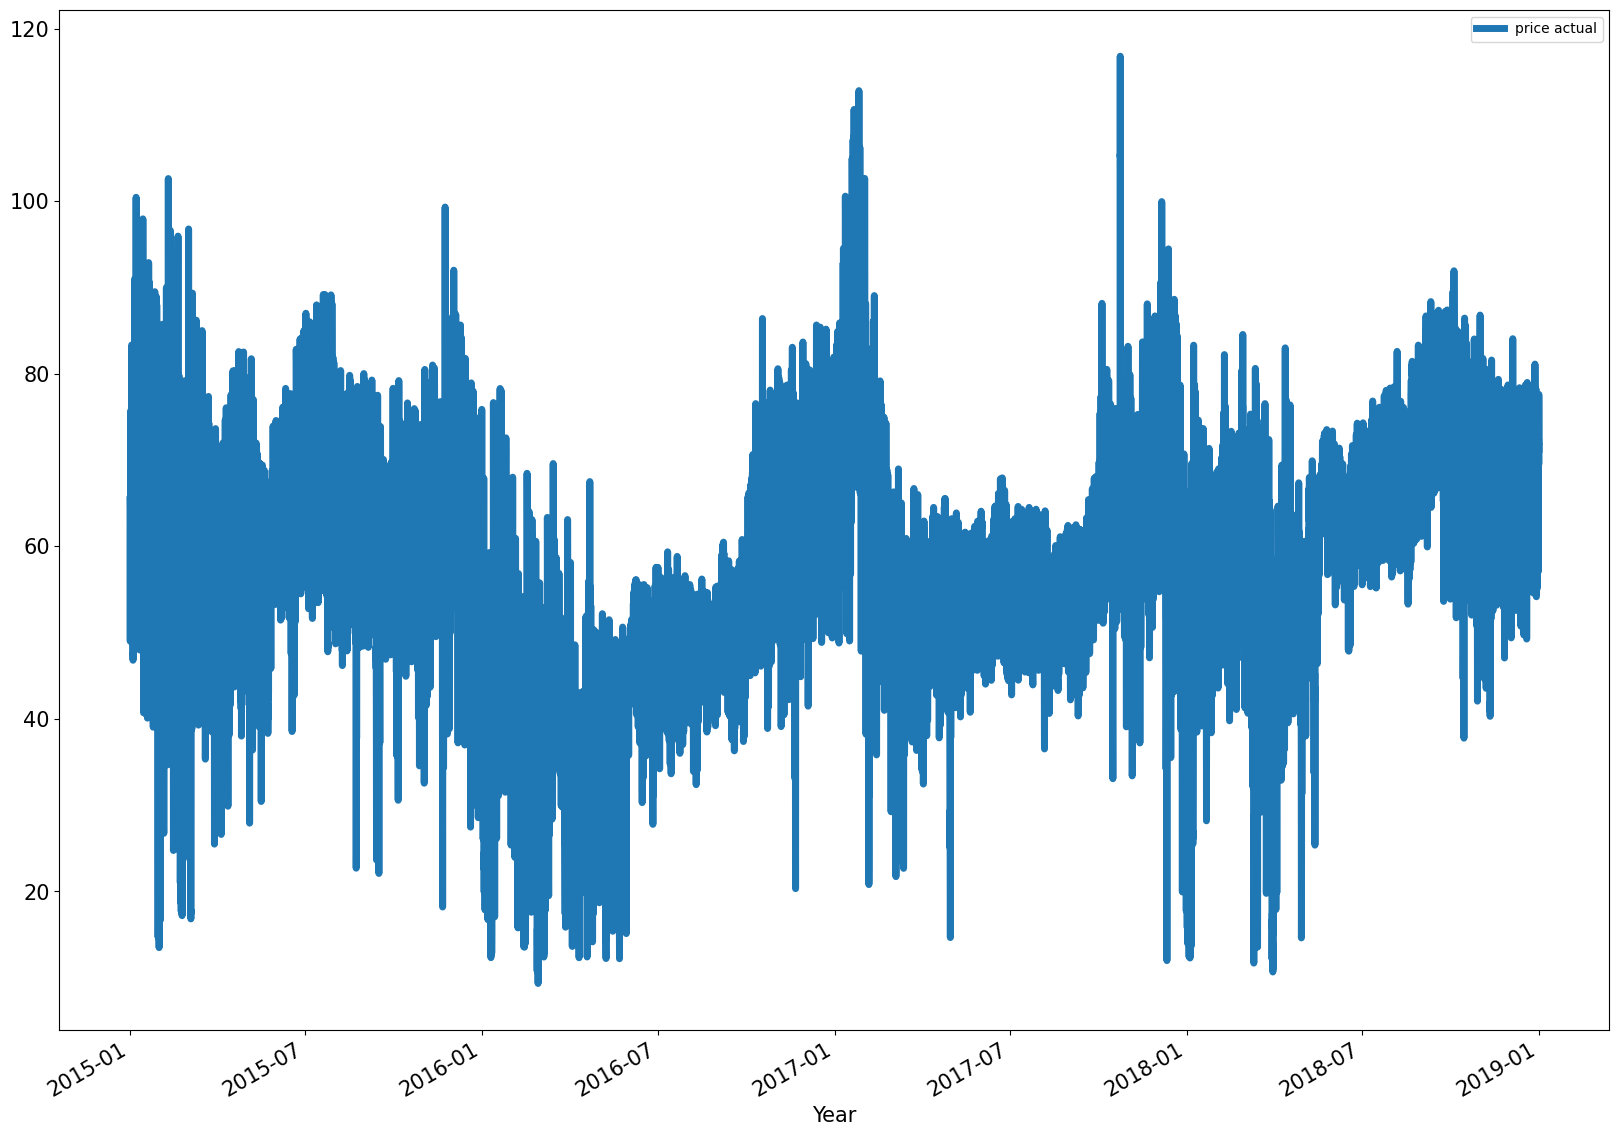

In [32]:
energyTime[['price actual']].plot(figsize=(20,15), linewidth=5, fontsize=15)
plt.xlabel('Year', fontsize=15);



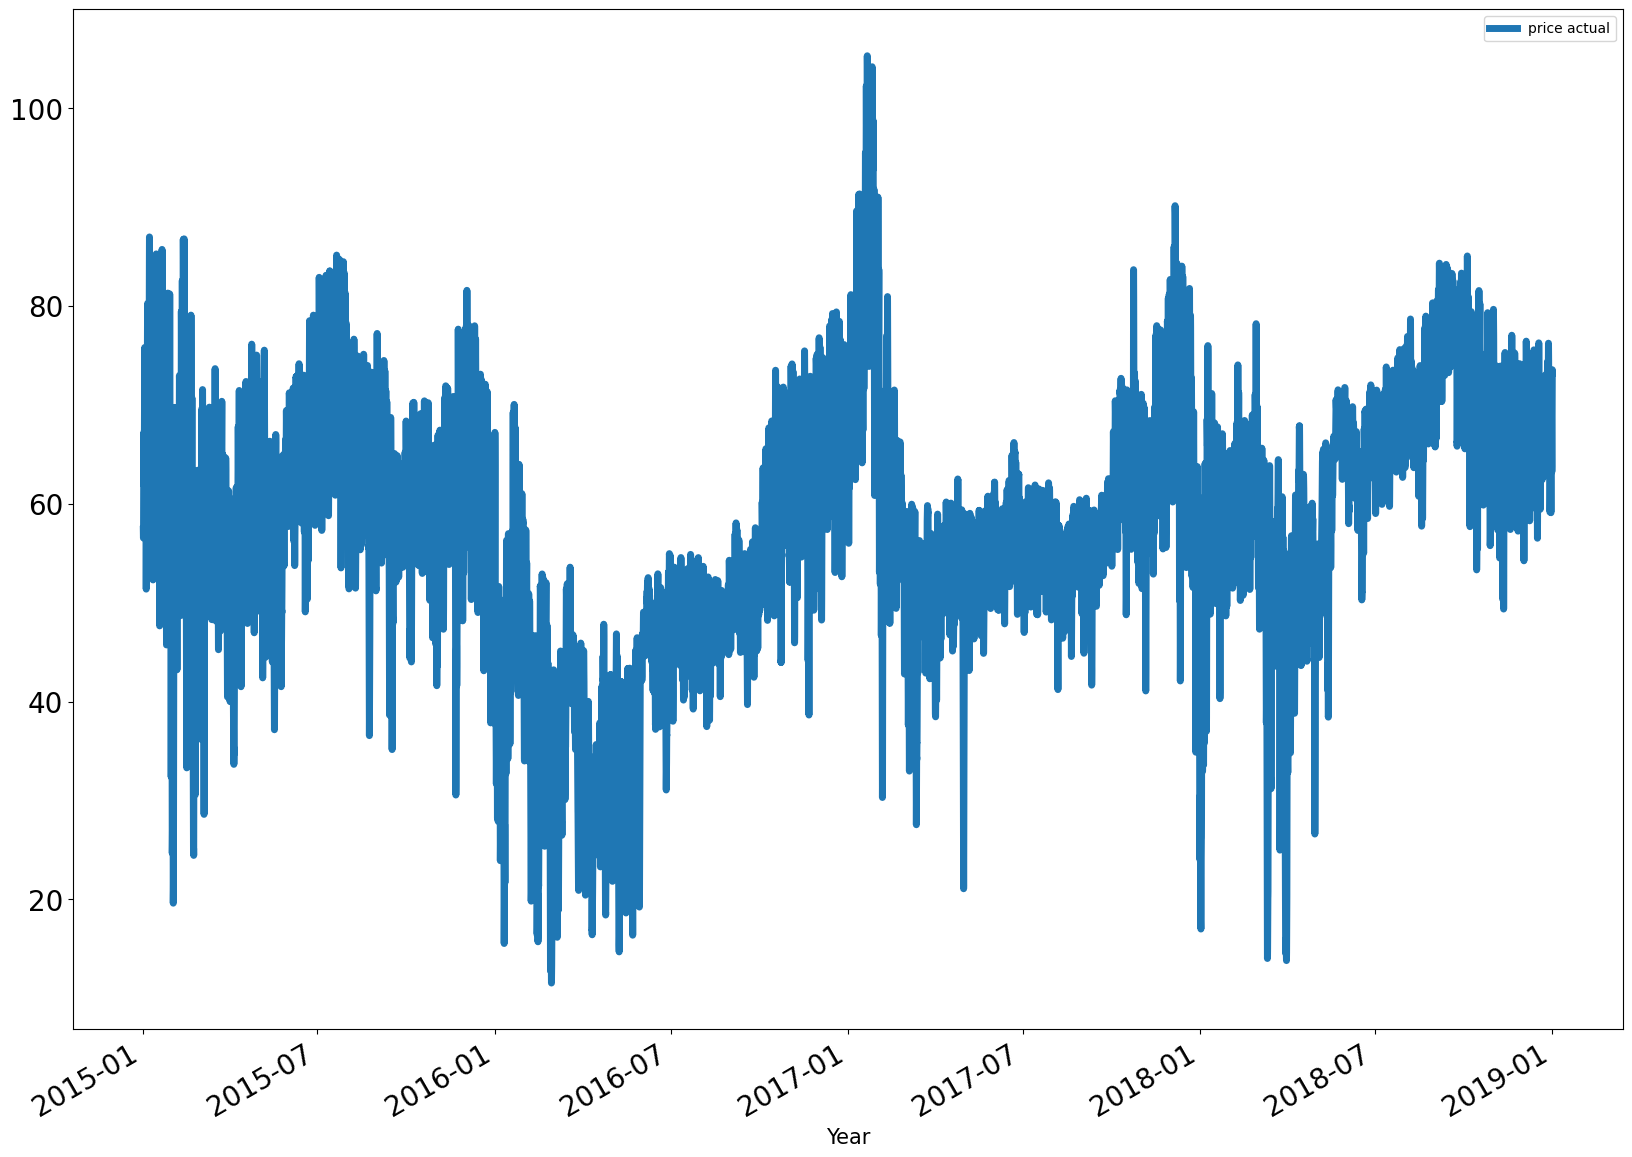

In [33]:
price = energyTime[['price actual']]
price.rolling(12).mean().plot(figsize=(20,15), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=15);

Text(0.5, 1.0, 'First-order differencing of Actual Price')

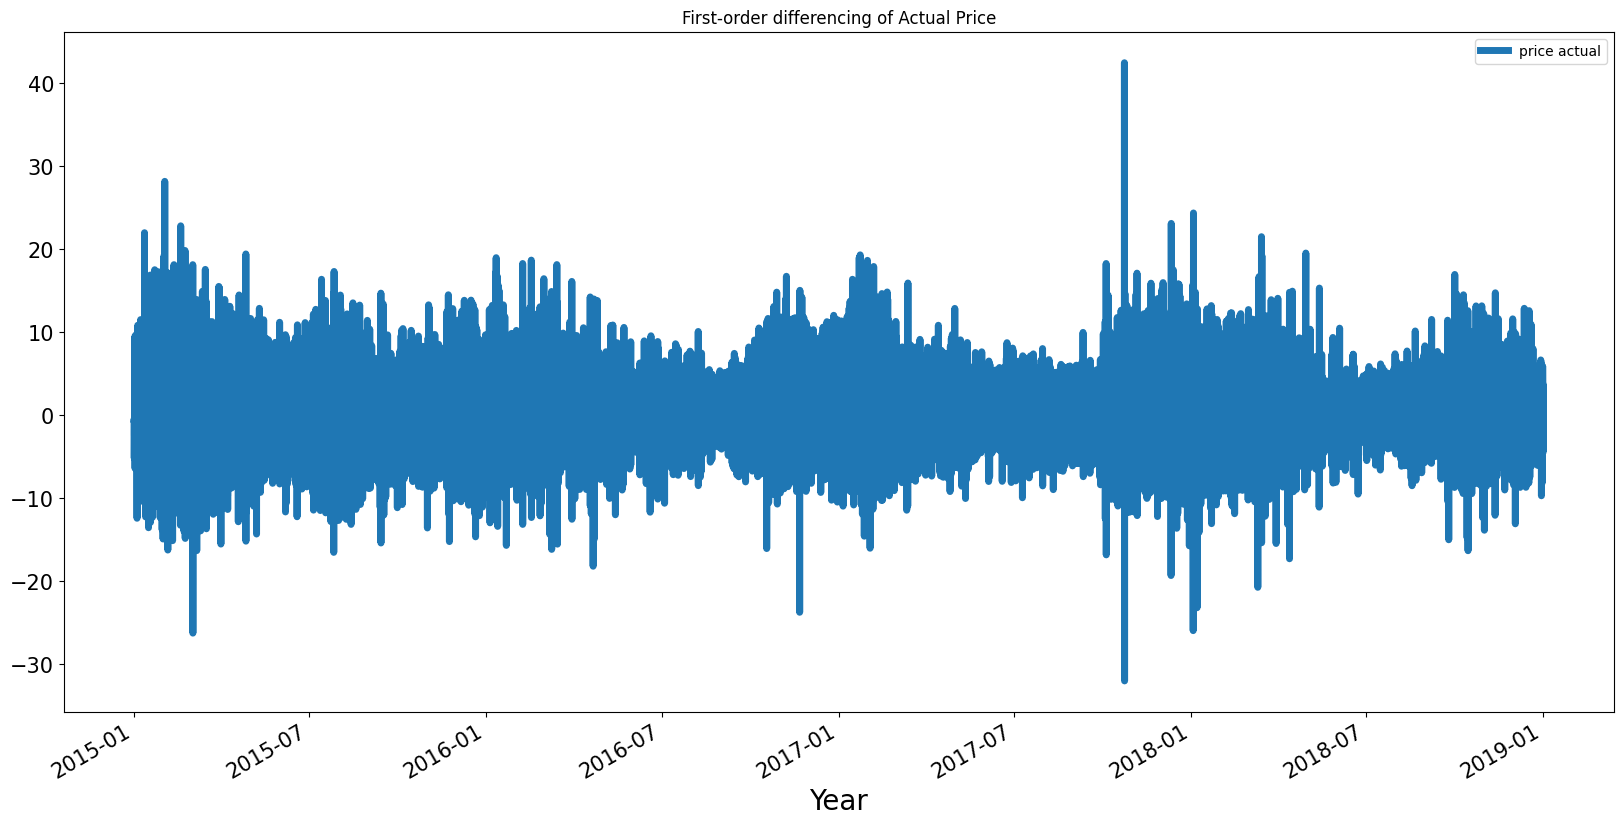

In [34]:
# First Order Differcing

price.diff().plot(figsize=(20,10), linewidth=5, fontsize=15)
plt.xlabel('Year', fontsize=20);
plt.title("First-order differencing of Actual Price")

Text(0.5, 1.0, 'First-order differencing of Actual Price')

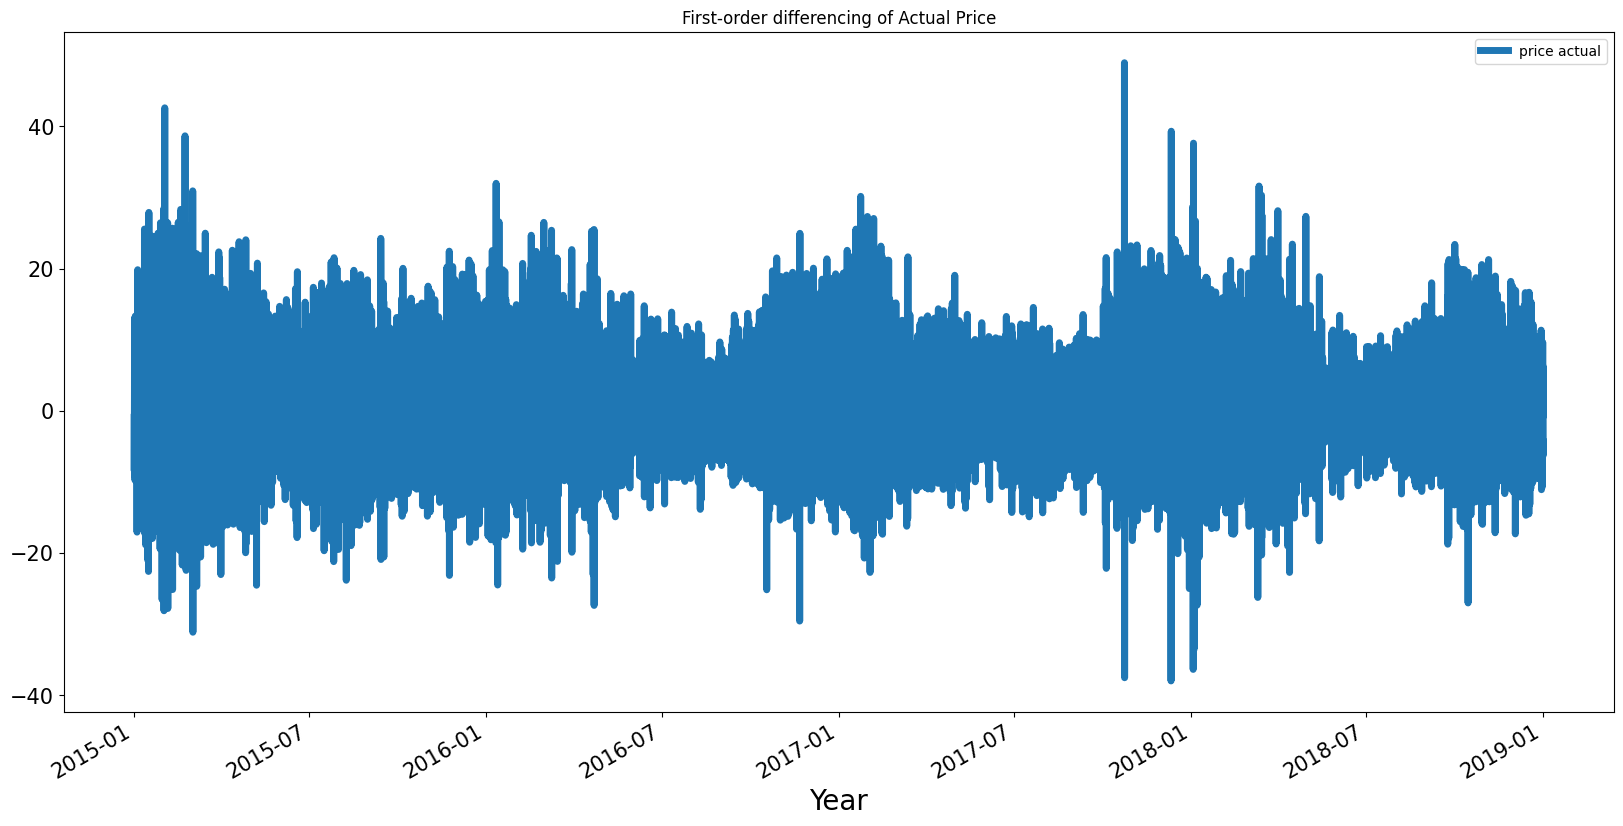

In [35]:
# Second Order Differcing

price.diff(periods = 2).plot(figsize=(20,10), linewidth=5, fontsize=15)
plt.xlabel('Year', fontsize=20);
plt.title("First-order differencing of Actual Price")

Text(0.5, 1.0, 'Total Electrical Price verses Time')

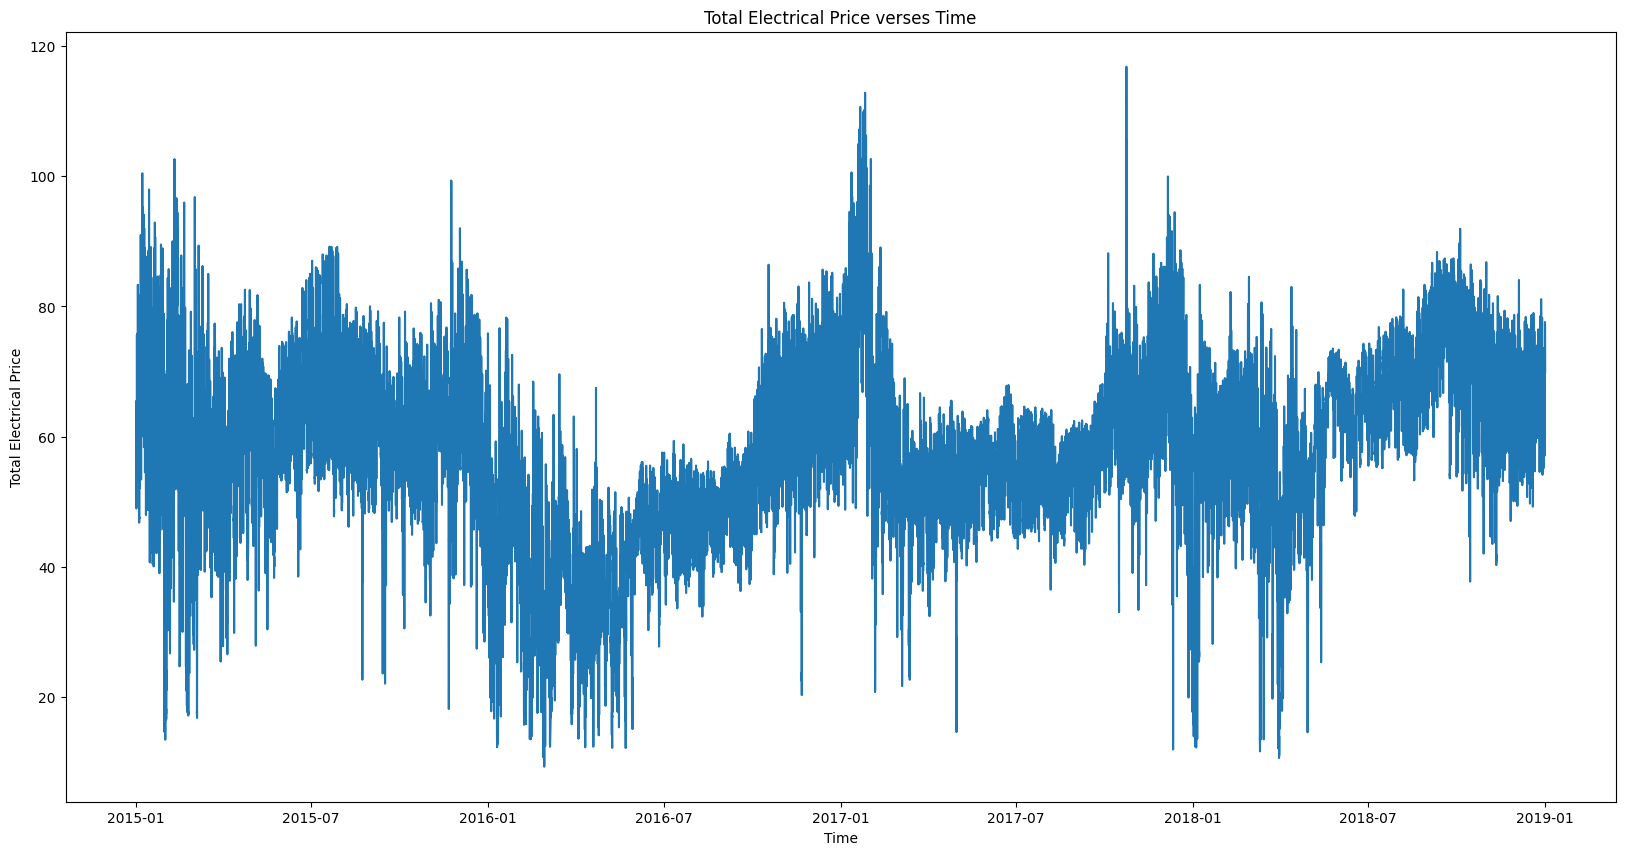

In [36]:
# same as above
plt.figure(figsize=(20,10))
sns.lineplot(data= energyCopy,x = energyCopy.index, y = 'price actual')
# https://seaborn.pydata.org/generated/seaborn.lineplot.html
plt.ylabel("Total Electrical Price")
plt.xlabel("Time")
plt.title("Total Electrical Price verses Time")

[]

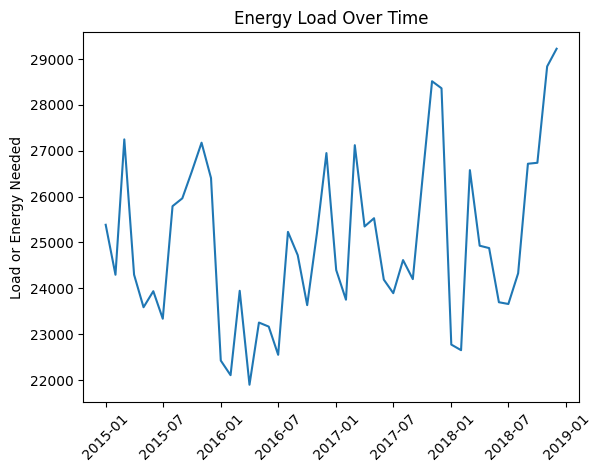

In [37]:
#Plot load consumption over time
monthly_load = energyCopy['total load actual'].asfreq('M')

fig, ax = plt.subplots(1,1)
ax.plot(monthly_load, label = 'monthly_load')
plt.title("Energy Load Over Time")
plt.ylabel("Load or Energy Needed")
plt.xticks(rotation =45)
plt.plot()

Text(0.5, 1.0, 'Total Load verses Time')

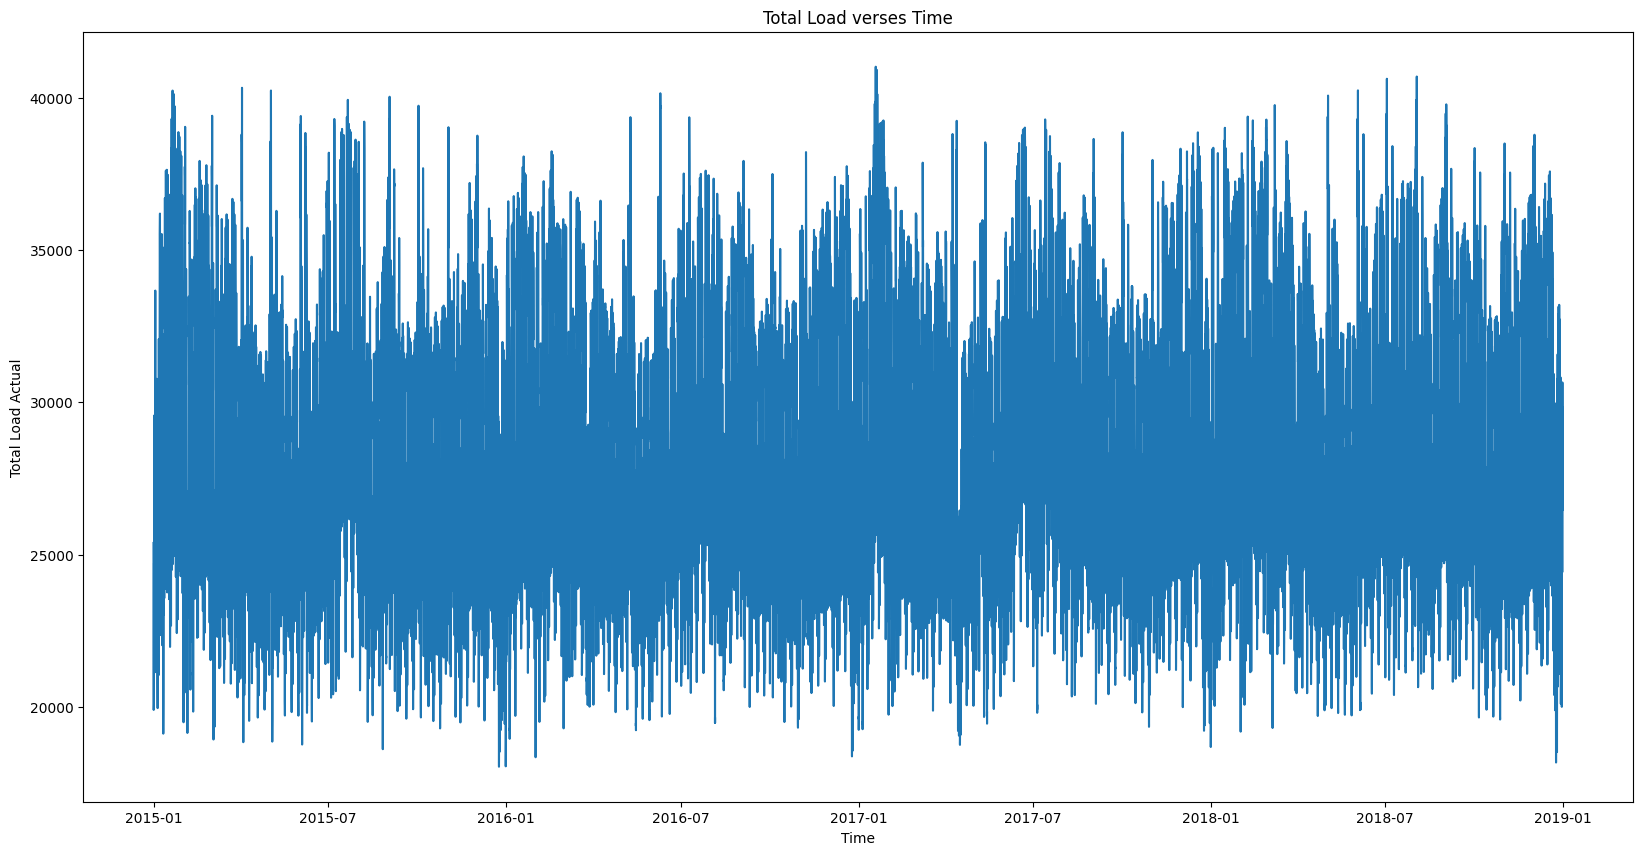

In [38]:
# same as above
plt.figure(figsize=(20,10))
sns.lineplot(data= energyCopy,x = energyCopy.index, y = 'total load actual')
# https://seaborn.pydata.org/generated/seaborn.lineplot.html
plt.ylabel("Total Load Actual")
plt.xlabel("Time")
plt.title("Total Load verses Time")

[]

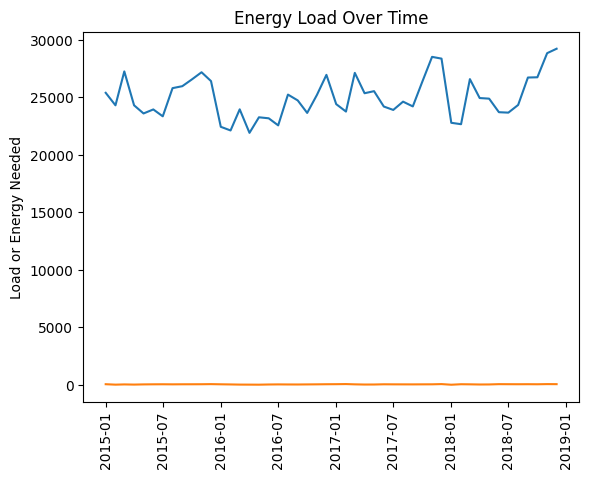

In [39]:
#Plot load consumption over time                           need to complete transformation
monthly_load = energyCopy['total load actual'].asfreq('M')
monthly_price = energyCopy['price actual'].asfreq('M')

fig, ax = plt.subplots(1,1)
ax.plot(monthly_load, label = 'Monthly_load')
ax.plot(monthly_price, label = 'monthly_price')
plt.title("Energy Load Over Time")
plt.ylabel("Load or Energy Needed")
plt.xticks(rotation =90)
plt.plot()

## Feature Engineering

Based on insights gained during EDA, new features are created to better capture the relationships in the data. The primary method, one-hot encoding, was needed to make categorical variables into a format where the models could interpret it. Correlation matrix was also used to filter out only the important features to use for the upcoming analysis. Additional steps could utilize variable grouping, interaction terms, or transformation of variables.

...above copied from sample.....

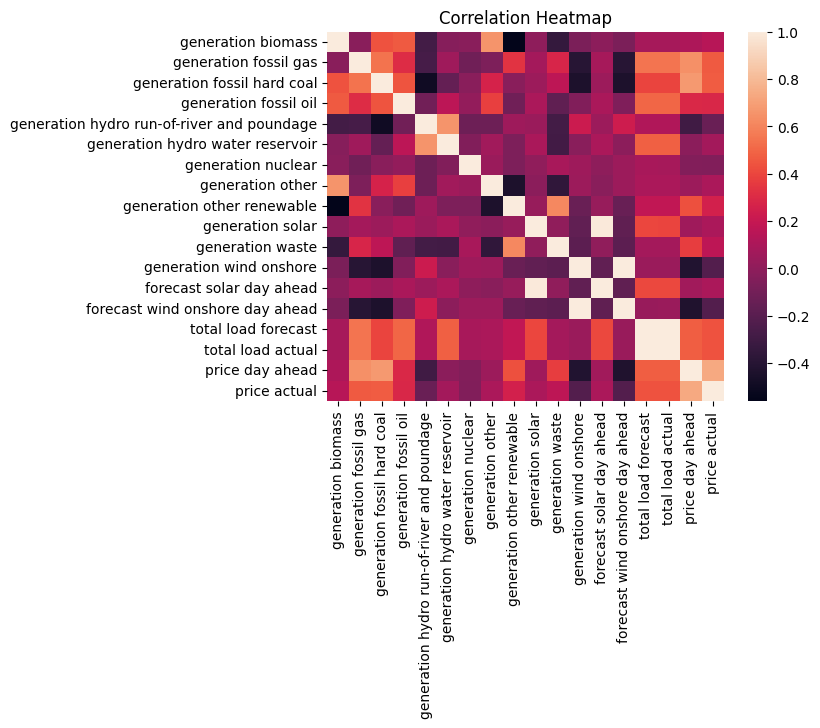

In [40]:
#Correlation Matrix
df = energyCopy.corr()
sns.heatmap(df,annot=False)
plt.title('Correlation Heatmap')
plt.show()

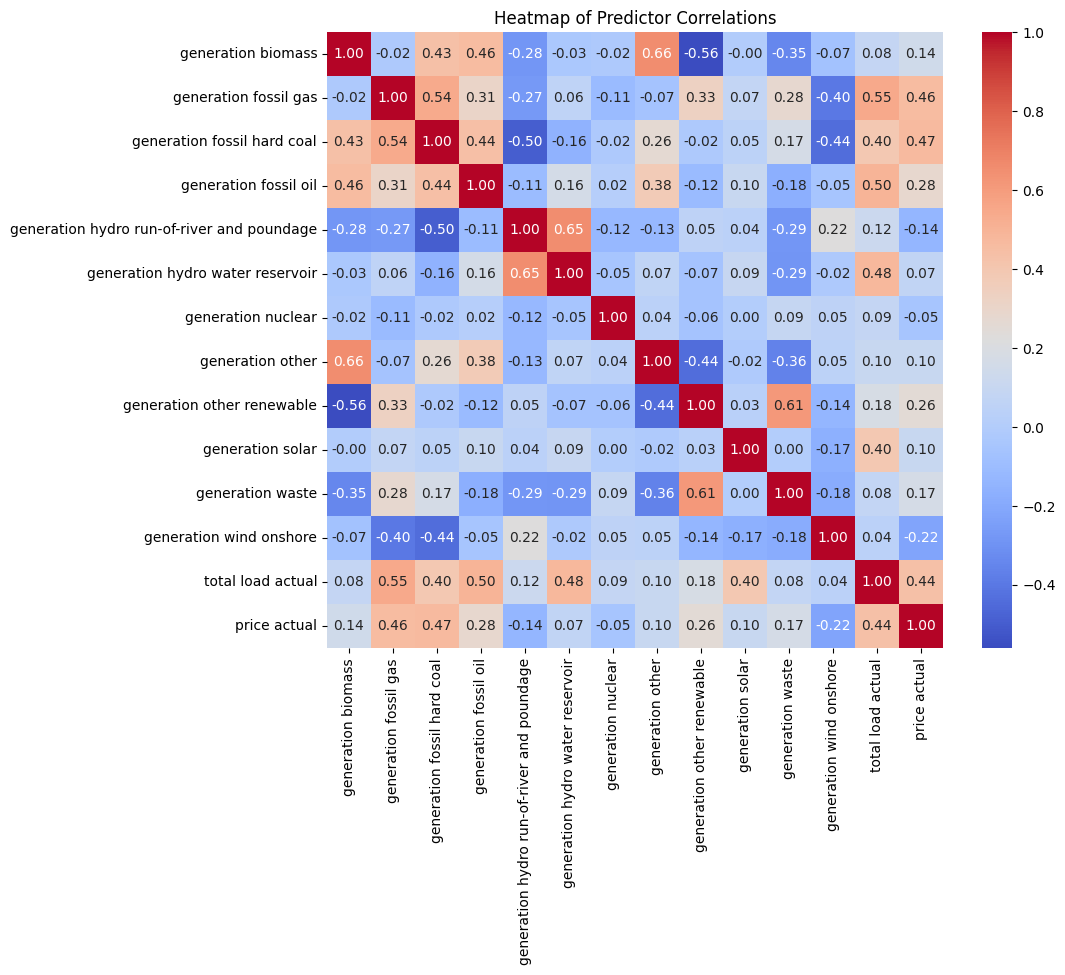

In [41]:
# Compute the correlation matrix
temp = energyCopy.loc[:, ~energyCopy.columns.isin(['price day ahead', 'total load forecast',
                                                   'forecast solar day ahead','forecast wind onshore day ahead'])]
corr = temp.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Heatmap of Predictor Correlations')
plt.show()

<ipython-input-42-8e24fd577321>:7: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


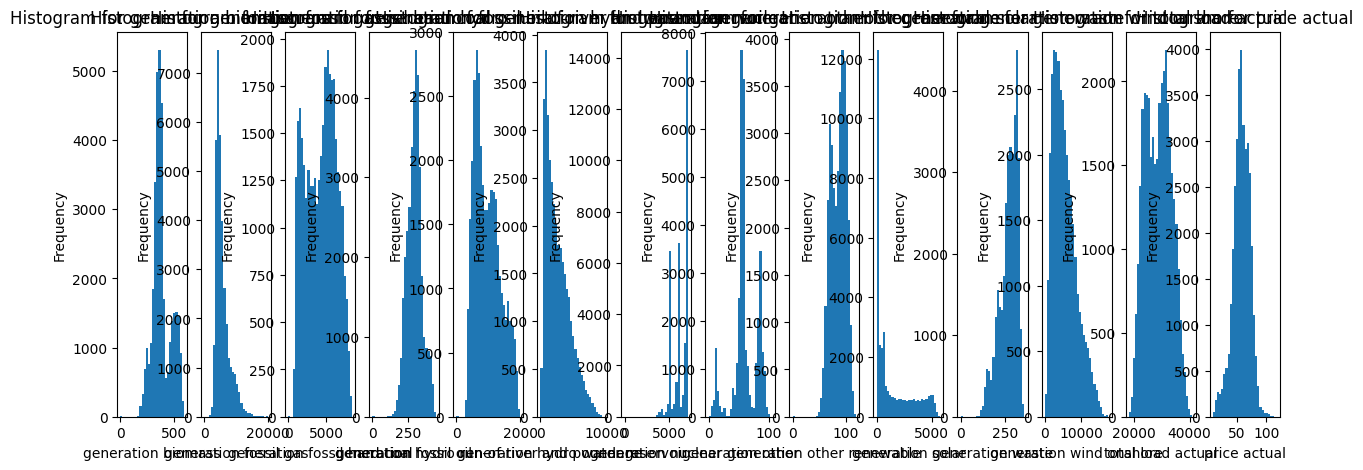

In [42]:
fig, axes = plt.subplots(1, len(temp.columns), figsize=(15, 5))
for i, column in enumerate(temp.columns):
    temp[column].plot(kind="hist", ax=axes[i], bins=30, title=f"Histogram for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

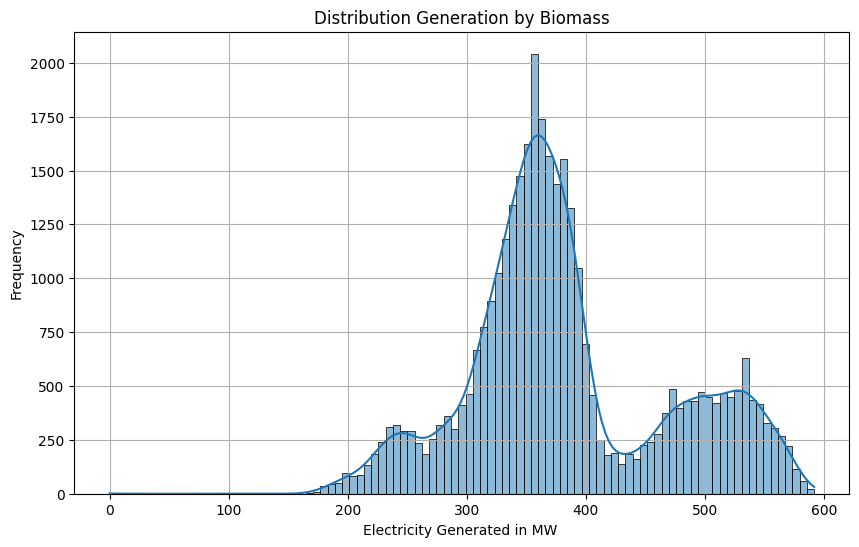

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data=temp, x='generation biomass', kde= True)
plt.title('Distribution Generation by Biomass')
plt.xlabel('Electricity Generated in MW ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [44]:
print(energyCopy['generation biomass'].mean())
print(energyCopy['generation biomass'].median())

383.513539734627
367.0


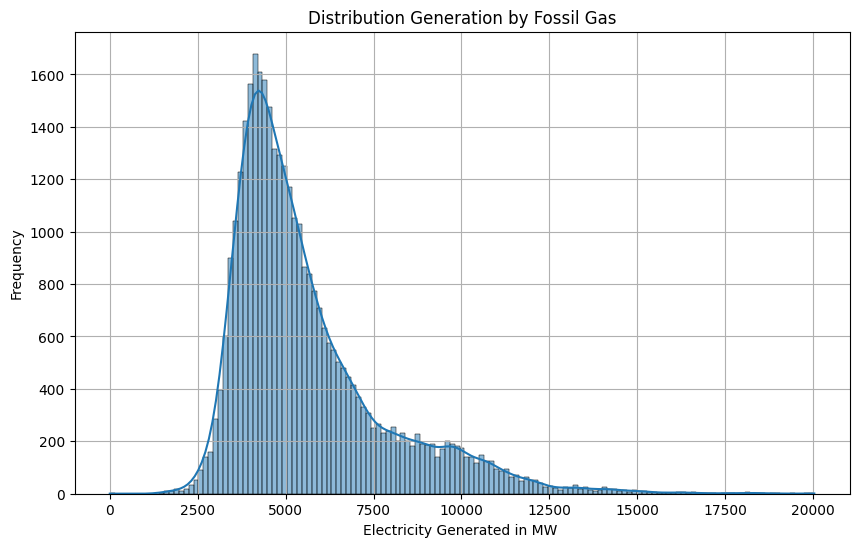

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=temp, x='generation fossil gas', kde= True)
plt.title('Distribution Generation by Fossil Gas')
plt.xlabel('Electricity Generated in MW ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [46]:
print(energyCopy['generation fossil gas'].mean())
print(energyCopy['generation fossil gas'].median())

5622.737487873082
4971.0


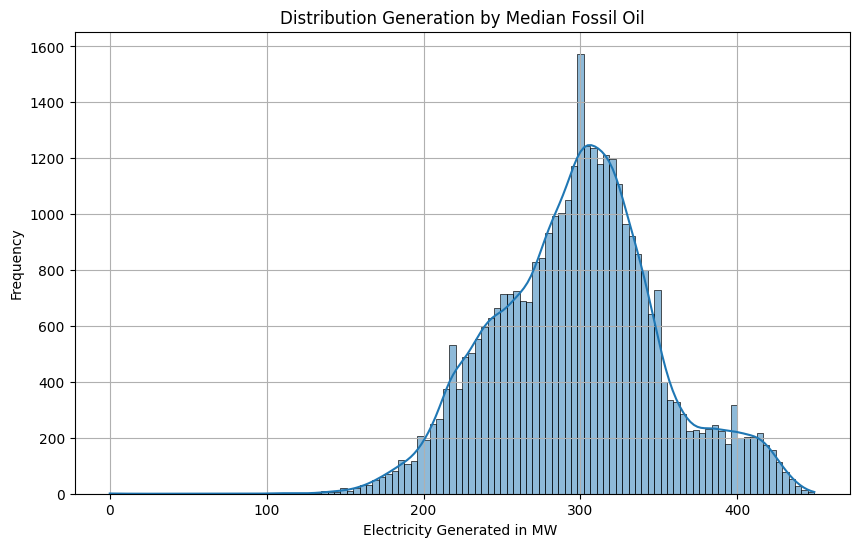

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data=temp, x= 'generation fossil oil', kde= True)
plt.title('Distribution Generation by Median Fossil Oil')
plt.xlabel('Electricity Generated in MW ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [48]:
print(energyCopy['generation fossil oil'].mean())
print(energyCopy['generation fossil oil'].median())

298.31978884291624
300.0


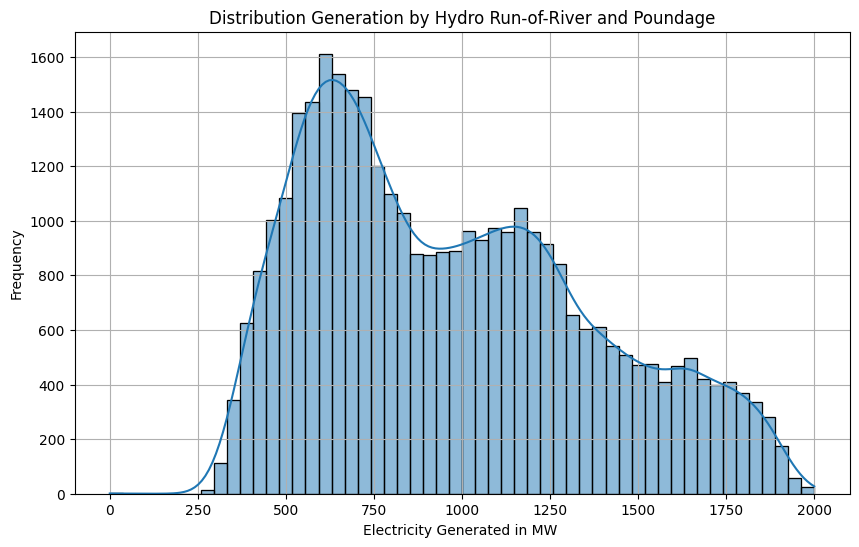

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(data=temp, x= 'generation hydro run-of-river and poundage', kde= True)
plt.title('Distribution Generation by Hydro Run-of-River and Poundage')
plt.xlabel('Electricity Generated in MW ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [50]:
print(energyCopy['generation hydro run-of-river and poundage'].mean())
print(energyCopy['generation hydro run-of-river and poundage'].median())

972.1161078613212
906.0


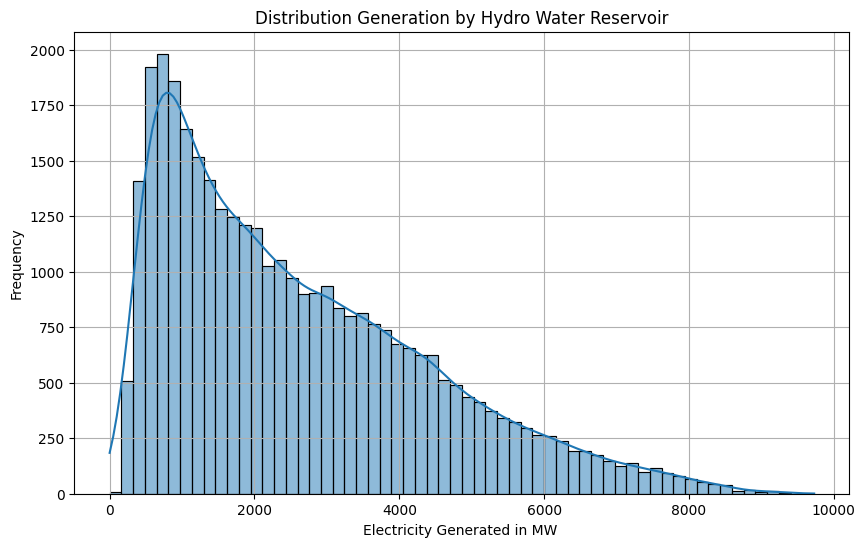

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data=temp, x= 'generation hydro water reservoir', kde= True)
plt.title('Distribution Generation by Hydro Water Reservoir')
plt.xlabel('Electricity Generated in MW ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [52]:
print(energyCopy['generation hydro water reservoir'].mean())
print(energyCopy['generation hydro water reservoir'].median())

2605.1147349198195
2165.0


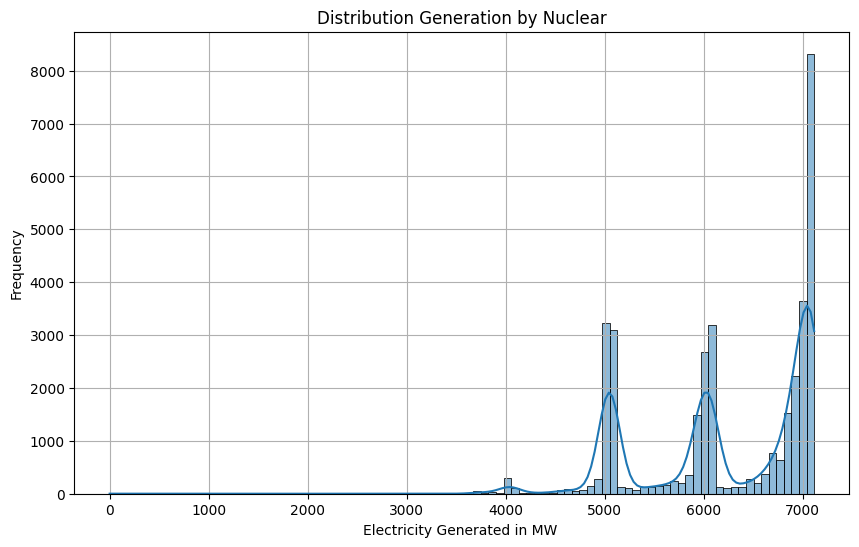

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(data=temp, x= 'generation nuclear', kde= True)
plt.title('Distribution Generation by Nuclear')
plt.xlabel('Electricity Generated in MW ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

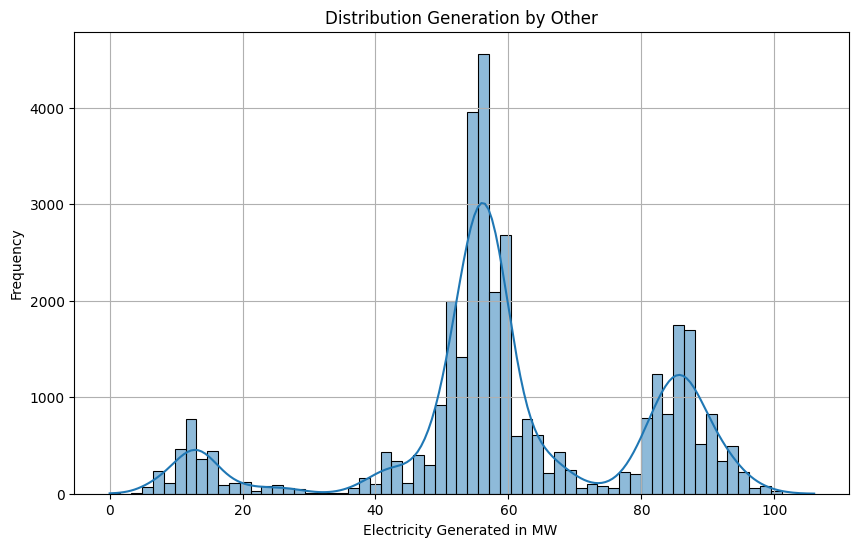

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(data=temp, x= 'generation other', kde= True)
plt.title('Distribution Generation by Other')
plt.xlabel('Electricity Generated in MW ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [55]:
print(energyCopy['generation other'].mean())
print(energyCopy['generation other'].median())

60.22858528790732
57.0


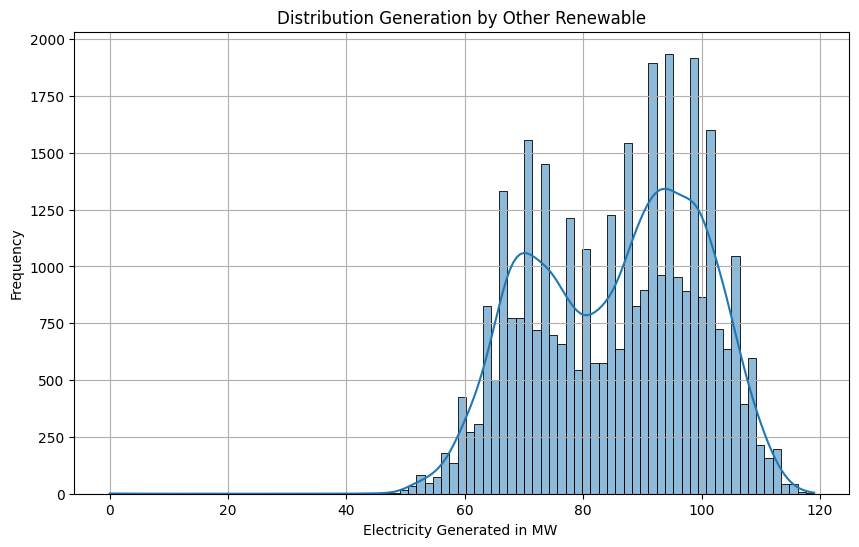

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(data=temp, x= 'generation other renewable', kde= True)
plt.title('Distribution Generation by Other Renewable')
plt.xlabel('Electricity Generated in MW ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [57]:
print(energyCopy['generation other renewable'].mean())
print(energyCopy['generation other renewable'].median())

85.6397021058038
88.0


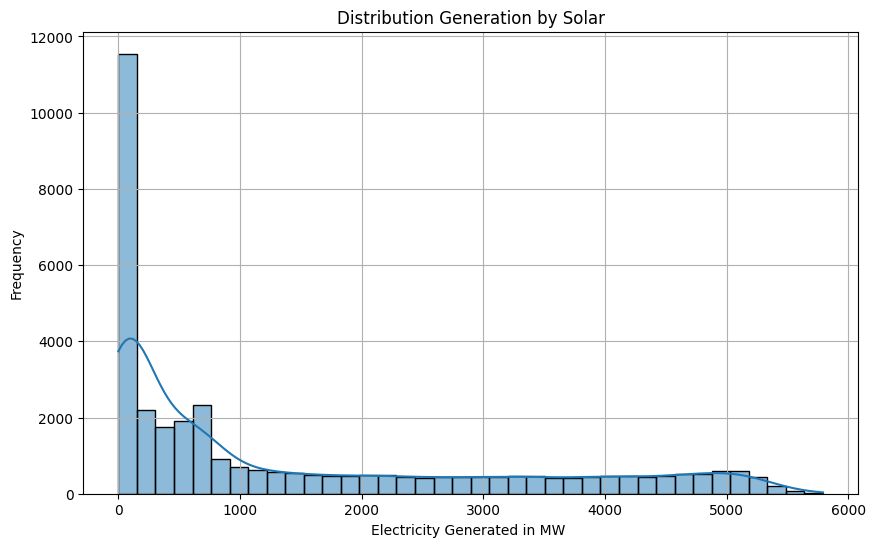

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(data=temp, x= 'generation solar', kde= True)
plt.title('Distribution Generation by Solar')
plt.xlabel('Electricity Generated in MW ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [59]:
print(energyCopy['generation solar'].mean())
print(energyCopy['generation solar'].median())

1432.6659247845687
616.0


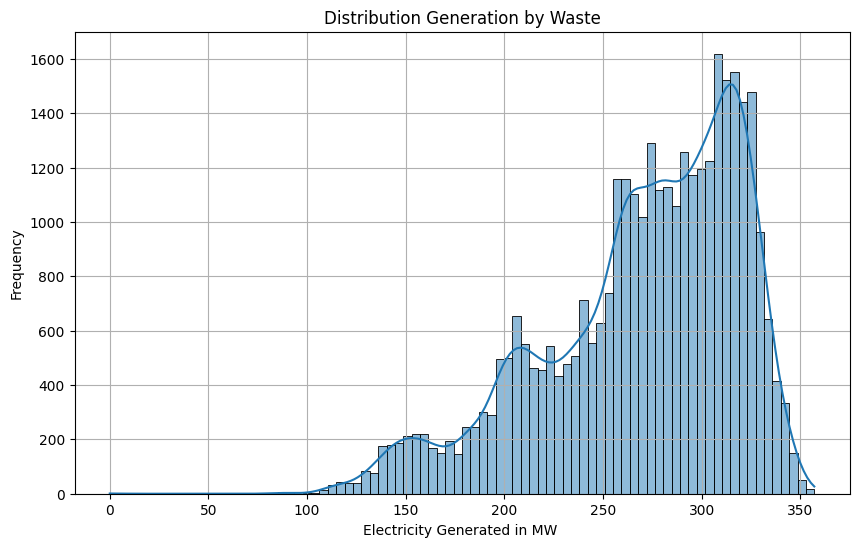

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(data=temp, x= 'generation waste', kde= True)
plt.title('Distribution Generation by Waste')
plt.xlabel('Electricity Generated in MW ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [61]:
print(energyCopy['generation waste'].mean())
print(energyCopy['generation waste'].median())

269.45213297189326
279.0


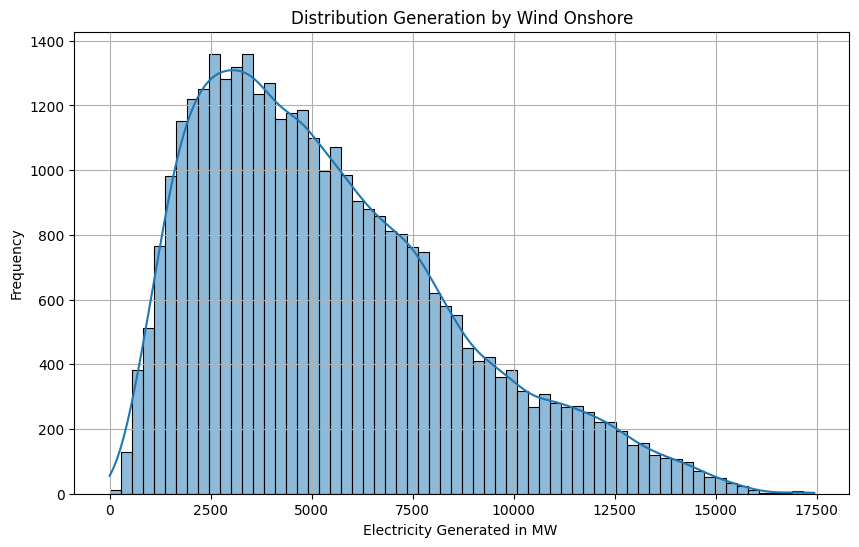

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(data=temp, x= 'generation wind onshore', kde= True)
plt.title('Distribution Generation by Wind Onshore')
plt.xlabel('Electricity Generated in MW ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [63]:
print(energyCopy['generation wind onshore'].mean())
print(energyCopy['generation wind onshore'].median())

5464.479769445871
4850.5


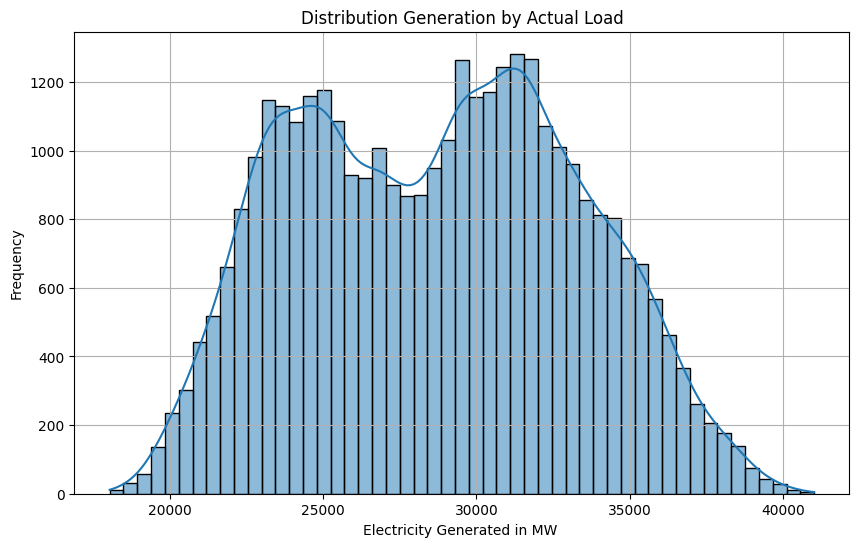

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(data=temp, x= 'total load actual', kde= True)
plt.title('Distribution Generation by Actual Load')
plt.xlabel('Electricity Generated in MW ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [65]:
print(energyCopy['total load actual'].mean())
print(energyCopy['total load actual'].median())

28696.93990521868
28894.0


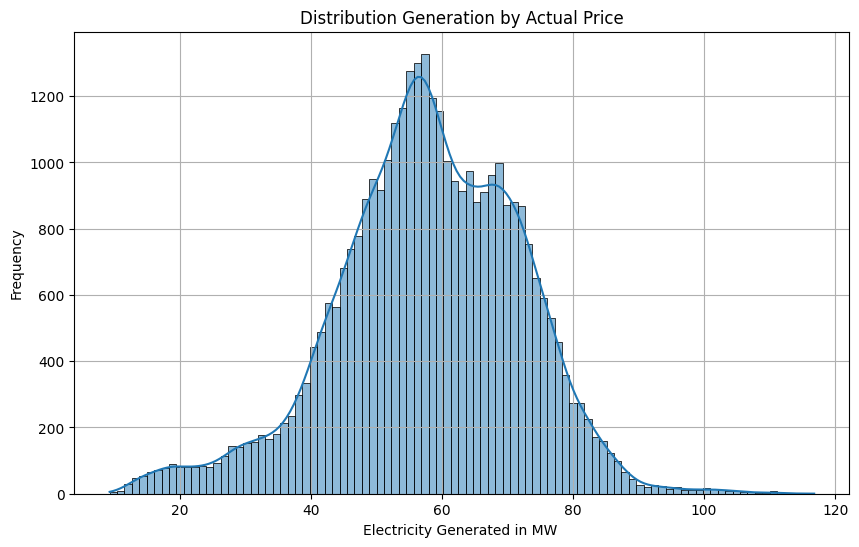

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(data=temp, x= 'price actual', kde= True)
plt.title('Distribution Generation by Actual Price')
plt.xlabel('Electricity Generated in MW ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [67]:
print(energyCopy['price actual'].mean())
print(energyCopy['price actual'].median())

57.88402292950034
58.02


In [68]:
energyCopy.columns

Index(['generation biomass', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

## Modeling - Decision Tree - Pricing

 This step involves applying statistical or machine learning models to the data to achieve the project's goal. It's where we take the insights from our EDA and feature engineering to test them out. We start by splitting the data into a training and testing set, while also assigning the variable we want to predict to the y variable. By training models on a portion of the data, we aim to create a formula that can accurately predict outcomes based on the input variables. We then use the statsmodel package to create a regression and Decision Tree model as laid out in the statsmodel documentation.





In [69]:
# import additonal libraries
# https://machinelearningtutorials.org/building-a-decision-tree-regressor-in-python-a-comprehensive-tutorial/
# https://www.datatechnotes.com/2020/10/regression-example-with-decisiontreeregressor.html

import itertools
from matplotlib.colors import ListedColormap
from sklearn import datasets #Import scikit-learn dataset library
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regressor
from sklearn.model_selection import GridSearchCV # Import for hyperparameter tuning
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix


### Using load as the precictor

In [70]:
energyCopy.columns

Index(['generation biomass', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [71]:
#split dataset in features and target variable -------12 features

#feature_cols = ['generation biomass', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil','generation hydro run-of-river and poundage',
#                'generation hydro water reservoir','generation nuclear','generation other', 'generation other renewable', 'generation solar',
#                'generation waste', 'generation wind onshore']
X = energyCopy.drop(['forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'], axis=1)# Features
y = energyCopy['price actual'] # Target variable

In [72]:
# Split dataset into training set and test set, declare random state for repeatability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 70% training and 30% test

In [73]:
# Building the Decision Tree Regressor
# Initialize the regressor
regressor = DecisionTreeRegressor(random_state=42)



## Model Evaluation - Decision Tree

Once models are built, the next critical step is to evaluate their performance. This involves using metrics such as Mean Squared Error (MSE) for regression tasks or accuracy for classification tasks. Evaluation helps us understand how well our model predicts on new, unseen data and guides us in selecting the best model for our needs. Note for MSE we want to choose the model with the smaller value.





In [74]:
# Fit the model on train data and check the model accuracy score.
model = regressor.fit(X_train, y_train)

score1 = model.score(X_train, y_train)
print("R-squared (training set):", score1)


R-squared (training set): 0.999910681853274


In [75]:
#Hypertuning Grid Search
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search
grid_search = GridSearchCV(regressor, param_grid, cv=5)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)

best_tuningModel =  grid_search.best_params_
print( grid_search.best_params_)

{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [76]:
# best model score
grid_search.best_score_

0.6216055280667258

In [77]:
# RandomizedSearchCV

# importing class from library

from sklearn.model_selection import RandomizedSearchCV
param = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## creating instance
random_search = RandomizedSearchCV(DecisionTreeRegressor(random_state=25), param, n_iter=10, cv=5)

## fitting data
random_search.fit(X_train, y_train)

## getting best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None}


In [78]:
# best model score
random_search.best_score_

0.621808573019351

In [79]:
# Fit the model on test data and check the model accuracy score.

score2 = model.score(X_test, y_test)
print("R-squared (test):", score2)

R-squared (test): 0.6227859361929835


In [80]:
# Predicting and accuracy check
# Make predictions on the test data
# https://www.datatechnotes.com/2020/10/regression-example-with-decisiontreeregressor.html

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
#mse - implies going forward we expect load values that our regression tree predicts to off by on average by 2,848,201
print("Results from test results: ", y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))
#RMSE tells us the average distance between the predict values from the model and the average value in the dataset.
# the lower RMSE, the better a model will fit the dataset.



Results from test results:  [63.83 81.44 39.39 ... 60.87 23.27 51.16]
MSE:  76.60008063767289
RMSE:  8.752147201554193


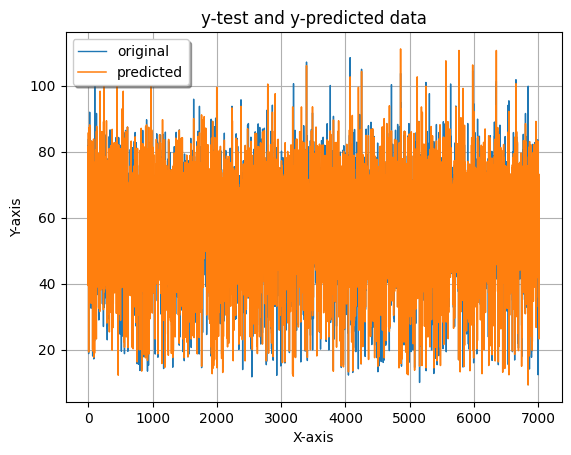

In [81]:
# visualize the original and predicted data in a plot.
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [82]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizing the Decision Tree
# Plot the decision tree
#plt.figure(figsize=(20, 10))
#plot_tree(regressor, filled=True, feature_names=X.columns)
#plt.show()


## Modeling - linear regression LR 1 (12 features)

 This step involves applying statistical or machine learning models to the data to achieve the project's goal. It's where we take the insights from our EDA and feature engineering to test them out. We start by splitting the data into a training and testing set, while also assigning the variable we want to predict to the y variable. By training models on a portion of the data, we aim to create a formula that can accurately predict outcomes based on the input variables. We then use the statsmodel package to create a regression and Decision Tree model as laid out in the statsmodel documentation.

In [83]:
#split dataset in features and target variable -------10 features

#feature_cols = ['generation biomass', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil','generation hydro run-of-river and poundage',
#                'generation hydro water reservoir','generation nuclear','generation solar',
#                'generation waste', 'generation wind onshore']
X = energyCopy.drop(['forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'], axis=1)# Features
y = energyCopy['price actual'] # Target variable

In [84]:
# Split dataset into training set and test set, declare random state for repeatability
X_train21, X_test21, y_train21, y_test21 = train_test_split(X, y, test_size=0.2, random_state=42) # 70% training and 30% test

In [85]:
import statsmodels.api as sm

#Add constant to independent variables
X_train21 = sm.add_constant(X_train21)
X_test21 = sm.add_constant(X_test21)

In [86]:
model2 = regressor.fit(X_train21, y_train21)
score2 = model2.score(X_train21, y_train21)
print("r-squared (training set):", score2)

r-squared (training set): 0.999910681853274


In [87]:
#Fitting the Model
lm2 = sm.OLS(y_train21, X_train21).fit()
#Print Model Summary
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:           price actual   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     1304.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:53:07   Log-Likelihood:            -1.0799e+05
No. Observations:               28051   AIC:                         2.160e+05
Df Residuals:                   28038   BIC:                         2.161e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [88]:
# Making predictions using our model
y_pred = lm2.predict(X_test21)
print(y_pred)

time
2015-09-10 21:00:00+00:00    63.381375
2018-09-20 07:00:00+00:00    71.857407
2016-01-04 13:00:00+00:00    58.868135
2015-03-03 18:00:00+00:00    63.085853
2015-06-25 18:00:00+00:00    62.062710
                               ...    
2018-07-07 16:00:00+00:00    58.591067
2016-10-07 17:00:00+00:00    51.545501
2017-07-14 09:00:00+00:00    71.572771
2015-11-27 03:00:00+00:00    53.245989
2016-02-20 10:00:00+00:00    59.942722
Length: 7013, dtype: float64


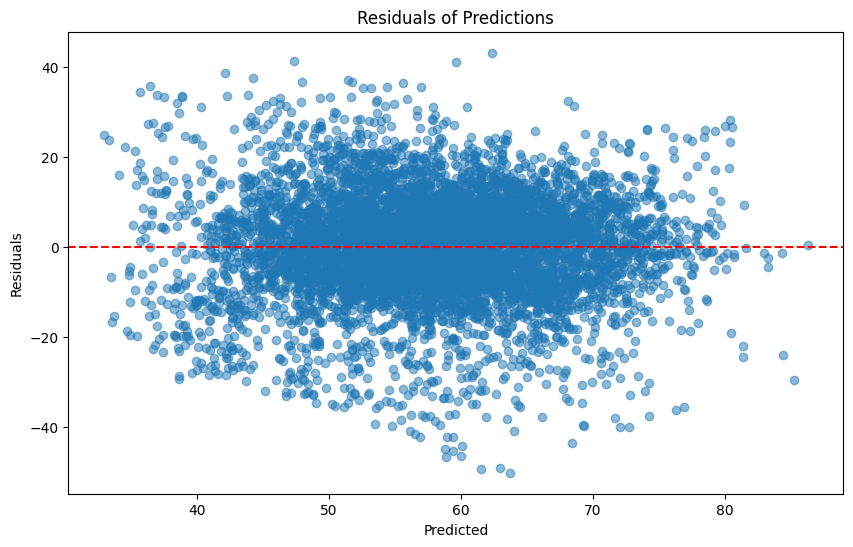

In [89]:
# Plotting the residuals

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Adds a horizontal line at y=0
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()

## Model Evaluation -  LR model

Once models are built, the next critical step is to evaluate their performance. This involves using metrics such as Mean Squared Error (MSE) for regression tasks or accuracy for classification tasks. Evaluation helps us understand how well our model predicts on new, unseen data and guides us in selecting the best model for our needs. Note for MSE we want to choose the model with the smaller value.





In [90]:
# Calculate the Mean Squared Error (MSE) for model 1 with other.....

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse1 = mean_squared_error(y_test21, y_pred)
print(f"Mean Squared Error (MSE): {mse1}")

# Root Mean Squared Error (RMSE)
rmse1 = np.sqrt(mse1)
print(f"Root Mean Squared Error (RMSE): {rmse1}")

# Mean Absolute Error (MAE)
mae1 = mean_absolute_error(y_test21, y_pred)
print(f"Mean Absolute Error (MAE): {mae1}")

# R-squared (R²)
r2_1 = r2_score(y_test21, y_pred)
print(f"R-squared (R²): {r2_1}")


Mean Squared Error (MSE): 131.51671018818703
Root Mean Squared Error (RMSE): 11.468073516863546
Mean Absolute Error (MAE): 8.712155049535161
R-squared (R²): 0.3523511686198294


## Improving the LR2 model (using just the final 10)

In [91]:
#split dataset in features and target variable
X1 = energyCopy.drop(['forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual','generation other', 'generation other renewable',], axis=1)# Features
y1 = energyCopy['price actual'] # Target variable

In [92]:
# Split dataset into training set and test set, declare random state for repeatability
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42) # 70% training and 30% test

In [93]:
#Add constant to independent variables
X_train1 = sm.add_constant(X_train1)
X_test1 = sm.add_constant(X_test1)

In [94]:
#Fitting the Model
lm3 = sm.OLS(y_train1, X_train1).fit()
#Print Model Summary
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:           price actual   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     1265.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:53:07   Log-Likelihood:            -1.0899e+05
No. Observations:               28051   AIC:                         2.180e+05
Df Residuals:                   28040   BIC:                         2.181e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

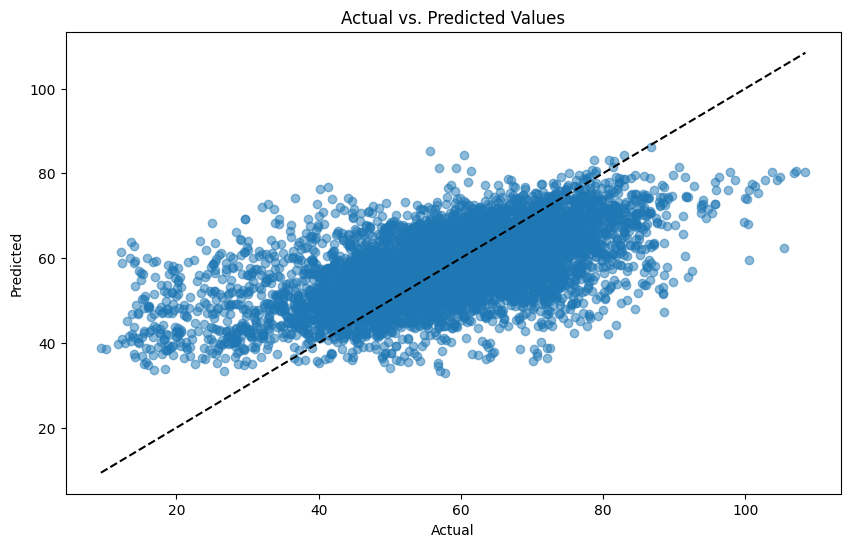

In [95]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

## Model Evaluation - LR2 model (can we improve)

Once models are built, the next critical step is to evaluate their performance. This involves using metrics such as Mean Squared Error (MSE) for regression tasks or accuracy for classification tasks. Evaluation helps us understand how well our model predicts on new, unseen data and guides us in selecting the best model for our needs. Note for MSE we want to choose the model with the smaller value.





In [97]:
# Calculate the Mean Squared Error (MSE) for model 1 with sex included

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse2 = mean_squared_error(y_test1, y_pred)
print(f"Mean Squared Error (MSE): {mse1}")

# Root Mean Squared Error (RMSE)
rmse2 = np.sqrt(mse2)
print(f"Root Mean Squared Error (RMSE): {rmse2}")

# Mean Absolute Error (MAE)
mae2 = mean_absolute_error(y_test1, y_pred)
print(f"Mean Absolute Error (MAE): {mae2}")

# R-squared (R²)
r2_2 = r2_score(y_test1, y_pred)
print(f"R-squared (R²): {r2_2}")


Mean Squared Error (MSE): 131.51671018818703
Root Mean Squared Error (RMSE): 11.468073516863546
Mean Absolute Error (MAE): 8.712155049535161
R-squared (R²): 0.3523511686198294


## Interpretation

Next we run inference on sample data to see how well our models perform. This involves making up values for the same variables used in the training set and observing the output. Note that the Decision Tree usually outputs higher premium amounts. Finally interpret the results and give recommendations tailored by the analysis findings!

...above copied from sample.....

Overview of the sections:
Opening the File: Begin by loading the dataset into a pandas DataFrame for visibility.

Preliminary Analysis: After loading the data, we conduct a preliminary examination of the dataset to understand its structure. We use methods such as examining the shape of the dataset, data types, and distribution of variables to make some initial observations.

Exploratory Data Analysis (EDA): Through various charts and statistical summaries, we explore the distribution and relationships among variables. The EDA helps uncover patterns, trends, and anomalies in the data. To ensure the quality of the data, Some charts used to examine the variable(s) include a Box Plot, Histogram, Bar Chart, Pie Chart, Violin Chart, and Scatter Plot. To ensure the quality of the analysis data cleaning, missing values, and outliers need to be handled if applicable! This is crucial to receive full points in your submission!

Feature Engineering: Based on insights gained during EDA, new features are created to better capture the relationships in the data. The primary method, one-hot encoding, was needed to make categorical variables into a format where the models could interpret it. Correlation matrix was also used to filter out only the important features to use for the upcoming analysis. Additional steps could utilize variable grouping, interaction terms, or transformation of variables.

Modeling: This step involves applying statistical or machine learning models to the data to achieve the project's goal. It's where we take the insights from our EDA and feature engineering to test them out. We start by splitting the data into a training and testing set, while also assigning the variable we want to predict to the y variable. By training models on a portion of the data, we aim to create a formula that can accurately predict outcomes based on the input variables. We then use the statsmodel package to create a regression and Decision Tree model as laid out in the statsmodel documentation.

Model Evaluation: Once models are built, the next critical step is to evaluate their performance. This involves using metrics such as Mean Squared Error (MSE) for regression tasks or accuracy for classification tasks. Evaluation helps us understand how well our model predicts on new, unseen data and guides us in selecting the best model for our needs. Note for MSE we want to choose the model with the smaller value.

Interpretation: